In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
n = int(input("Enter the number of stocks in your universe (between 10 and 50): "))

Enter the number of stocks in your universe (between 10 and 50): 8


#Returns 


In [4]:
# Load the dataset into a Pandas DataFrame and calculate weekly returns

df = pd.read_csv(r'C:\Users\Nikitk P.K\Desktop\10stocksdata.csv')
df=df.drop('Date',axis=1)
# select n random stocks from dataframe
stocks = random.sample(list(df.columns), n)
returns = df[stocks].pct_change().dropna()



In [5]:
returns

,HUL,NSTL,ULTC,KTK,BRT,ONGC,SBI,ITC
1,-0.015368,0.099609,0.011413,-0.010910,0.000965,-0.007940,0.008266,-0.020747
2,0.040412,-0.012191,0.000477,0.009140,0.016292,0.014129,0.041424,0.021990
3,-0.035360,0.018647,0.010961,-0.012180,0.022861,0.055399,-0.025067,-0.052899
4,0.000278,-0.014768,-0.005028,-0.029719,-0.018177,-0.072308,-0.007862,0.033436
5,-0.026652,-0.008348,-0.017688,-0.021831,-0.002456,-0.015733,-0.016064,-0.039658
...,...,...,...,...,...,...,...,...
1070,-0.024054,-0.000134,0.012739,-0.007223,-0.019350,0.067485,-0.039870,0.032449
1071,-0.012443,-0.017896,-0.011120,-0.035214,-0.020008,-0.010217,-0.018738,0.020275
1072,-0.005314,-0.012366,-0.000104,0.031638,-0.006888,0.021584,0.077056,-0.000389
1073,-0.002246,0.001943,0.001448,-0.029526,-0.022881,0.010049,-0.024679,0.007923


In [6]:
# Define a lambda function to multiply each value by 100
multiply_by_100 = lambda x: x * 100

# Apply the lambda function to all columns of the DataFrame
returns = returns.apply(multiply_by_100)

# Print the updated DataFrame
print(returns.head())

        HUL      NSTL      ULTC       KTK       BRT      ONGC       SBI  \
1 -1.536754  9.960851  1.141295 -1.091025  0.096479 -0.794013  0.826596   
2  4.041246 -1.219086  0.047661  0.913952  1.629234  1.412902  4.142398   
3 -3.536049  1.864723  1.096113 -1.217986  2.286104  5.539851 -2.506714   
4  0.027829 -1.476819 -0.502817 -2.971861 -1.817691 -7.230831 -0.786228   
5 -2.665173 -0.834799 -1.768798 -2.183120 -0.245584 -1.573334 -1.606373   

        ITC  
1 -2.074668  
2  2.199005  
3 -5.289867  
4  3.343645  
5 -3.965837  


#Mean and variance of returns


In [7]:
# Calculate the variance of each feature and store in a Pandas Series
means= returns.mean()
variances = returns.var()

# Convert the Pandas Series to numpy arrays
means_arr = means.to_numpy()
variances_arr = variances.to_numpy()

# Print the arrays of means and variances
print(means_arr)
print(variances_arr)


[0.35363531 0.58786826 0.46114484 0.64598493 0.50352229 0.32184616
 0.45438106 0.40546557]
[ 13.44872807 135.67685372  25.27123385  28.41090646  12.58529014
  22.89033335  27.04443828  13.32672714]


In [8]:
annualized_returns= means_arr*52
annualized_variance= variances_arr*52

In [9]:
print(annualized_returns)
print(annualized_variance)

[18.38903634 30.56914938 23.97953143 33.59121636 26.18315891 16.73600038
 23.62781511 21.0842098 ]
[ 699.33385977 7055.19639337 1314.10416018 1477.36713581  654.43508749
 1190.29733431 1406.3107903   692.98981119]


#Calculate Excess Returns


In [10]:

# Define a lambda function to subtract the column mean from each value
subtract_mean = lambda x: x - x.mean()

# Apply the lambda function to all columns of the DataFrame
excess = returns.apply(subtract_mean)

# Print the updated DataFrame
print(excess.head())



        HUL      NSTL      ULTC       KTK       BRT      ONGC       SBI  \
1 -1.890389  9.372983  0.680150 -1.737010 -0.407043 -1.115860  0.372215   
2  3.687611 -1.806954 -0.413484  0.267967  1.125712  1.091055  3.688017   
3 -3.889685  1.276855  0.634968 -1.863971  1.782582  5.218005 -2.961095   
4 -0.325807 -2.064688 -0.963961 -3.617846 -2.321214 -7.552677 -1.240609   
5 -3.018808 -1.422667 -2.229943 -2.829105 -0.749106 -1.895180 -2.060754   

        ITC  
1 -2.480133  
2  1.793540  
3 -5.695332  
4  2.938179  
5 -4.371303  


##Variance - Covariance Matrix



In [11]:

# Calculate the variance-covariance matrix of the DataFrame
covariance_matrix = returns.cov()

# annualized covariance matrix
ann_covariance_matrix= covariance_matrix*52

# Print the variance-covariance matrix
print(ann_covariance_matrix)


             HUL         NSTL         ULTC          KTK         BRT  \
HUL   699.333860   124.037311   185.285639   270.614756  173.347074   
NSTL  124.037311  7055.196393   241.197871   150.955984   71.818381   
ULTC  185.285639   241.197871  1314.104160   397.198488  177.322022   
KTK   270.614756   150.955984   397.198488  1477.367136  224.024953   
BRT   173.347074    71.818381   177.322022   224.024953  654.435087   
ONGC  219.751554   104.322643   375.663762   426.269518  127.374295   
SBI   218.705091    83.419504   494.967187   765.775021  183.803517   
ITC   234.590684    91.952079   242.396340   307.603375  118.309433   

             ONGC          SBI         ITC  
HUL    219.751554   218.705091  234.590684  
NSTL   104.322643    83.419504   91.952079  
ULTC   375.663762   494.967187  242.396340  
KTK    426.269518   765.775021  307.603375  
BRT    127.374295   183.803517  118.309433  
ONGC  1190.297334   571.360442  275.560333  
SBI    571.360442  1406.310790  293.844468  


##Efficient Portfolio using Monte Carlo

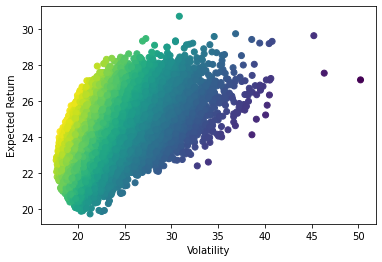

In [12]:
import matplotlib.pyplot as plt

# Calculate the mean returns and covariance matrix of the returns
mean_returns = np.mean(returns, axis=0)
cov_matrix = np.cov(returns.T)

#Annualizing
mean_returns=mean_returns*52
cov_matrix = cov_matrix*52

# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = results[0,i] / results[1,i]

# Plot the results
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.show()


In [13]:
mean_returns

HUL     18.389036
NSTL    30.569149
ULTC    23.979531
KTK     33.591216
BRT     26.183159
ONGC    16.736000
SBI     23.627815
ITC     21.084210
dtype: float64

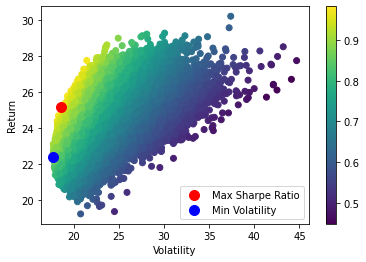

In [23]:


# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility
# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i] - 6.9 )/ results[1,i]
    for j in range(n):
        results[j+3,i] = weights[j]


# create DataFrame to store simulation results
results = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'] + [f'Stock {i+1}' for i in range(n)])

# find portfolio with highest Sharpe ratio
max_sharpe_port = results.iloc[results['Sharpe Ratio'].idxmax()]

# find portfolio with minimum volatility
min_vol_port = results.iloc[results['Volatility'].idxmin()]


# plot efficient frontier
plt.scatter(results['Volatility'], results['Return'], c=results['Sharpe Ratio'], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar()
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='o', color='r', s=100, label='Max Sharpe Ratio')
plt.scatter(min_vol_port[1], min_vol_port[0], marker='o', color='b', s=100, label='Min Volatility')
plt.legend()
plt.show()




#Accomodating the shortselling

Return          20.962567
Volatility      15.865557
Sharpe Ratio     1.321263
Stock 1          0.090155
Stock 2          0.031960
Stock 3          0.023780
Stock 4          0.221156
Stock 5          0.318636
Stock 6          0.014245
Stock 7         -0.102420
Stock 8          0.197647
Name: 94262, dtype: float64
Return          1.695893
Volatility      8.981290
Sharpe Ratio    0.188825
Stock 1        -0.149962
Stock 2         0.025667
Stock 3        -0.123880
Stock 4        -0.094246
Stock 5         0.169316
Stock 6        -0.113050
Stock 7         0.171167
Stock 8         0.152712
Name: 92091, dtype: float64


C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


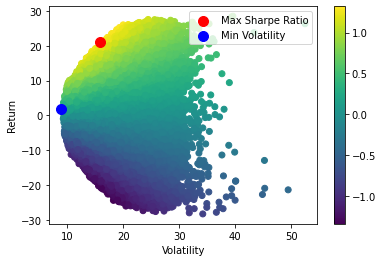

In [15]:
# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))
   
# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    # Generate random weights that can be negative
    weights = np.random.uniform(low=-1, high=1, size=n)
    # Normalize the weights to sum up to 1
    weights /= np.sum(np.abs(weights))
    # Calculate portfolio return and volatility
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    # Store the results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = results[0,i] / results[1,i]
    for j in range(n):
        results[j+3,i] = weights[j]

# create DataFrame to store simulation results
results = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'] + [f'Stock {i+1}' for i in range(n)])

# find portfolio with highest Sharpe ratio
max_sharpe_port = results.iloc[results['Sharpe Ratio'].idxmax()]
print(max_sharpe_port)
# find portfolio with minimum volatility
min_vol_port = results.iloc[results['Volatility'].idxmin()]
print(min_vol_port)
# plot efficient frontier
plt.scatter(results['Volatility'], results['Return'], c=results['Sharpe Ratio'], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar()
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='o', color='r', s=100, label='Max Sharpe Ratio')
plt.scatter(min_vol_port[1], min_vol_port[0], marker='o', color='b', s=100, label='Min Volatility')
plt.legend()
plt.show()

# Efficient Frontier using optimization



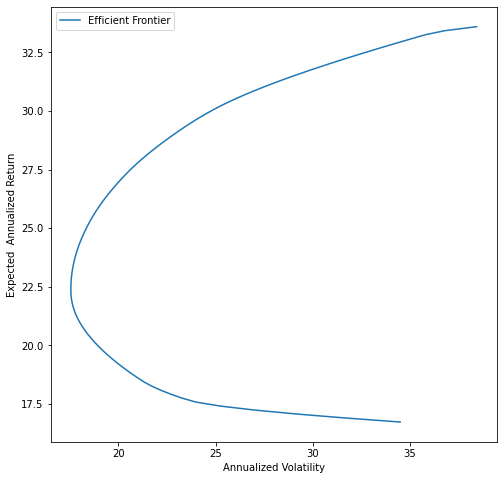

In [24]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
plt.figure(figsize=(n, n))
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.legend()
plt.show()



# Optimal Weights for Minimum Volatality in QP


In [25]:
# Find the index of the minimum volatility point on the efficient frontier
min_volatility_idx = np.argmin(efficient_frontier_volatilities)

# Get the corresponding target return
min_volatility_target_return = target_returns[min_volatility_idx]

# Find the optimal weights for the minimum volatility point
constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, min_volatility_target_return)},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, min_volatility_target_return), method='SLSQP', bounds=bounds, constraints=constraints)
min_volatility_weights = result['x']

# Calculate the corresponding expected return and volatility
min_volatility_return = np.dot(min_volatility_weights.T, mean_returns)
min_volatility = efficient_frontier_volatilities[min_volatility_idx]

# Print the results
print(f"Optimal weights for minimum volatility: {min_volatility_weights}")
print(f"Expected return for minimum volatility: {min_volatility_return:.4f}")
print(f"Volatility for minimum volatility: {min_volatility:.4f}")


Optimal weights for minimum volatility: [0.22022063 0.02886474 0.07373271 0.00654351 0.31787722 0.0900637
 0.02571345 0.23698405]
Expected return for minimum volatility: 22.3544
Volatility for minimum volatility: 17.5521


#Optimal Weights for Maximum Sharpe Ratio in QP

In [26]:
# Set the risk-free rate
risk_free_rate = 6.9

def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Find the optimal weights for the maximum Sharpe ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
max_sharpe_weights = result['x']

# Calculate the corresponding expected return and volatility
max_sharpe_return = np.dot(max_sharpe_weights.T, mean_returns)
max_sharpe_volatility = np.sqrt(np.dot(max_sharpe_weights.T, np.dot(cov_matrix, max_sharpe_weights)))
max_sharpe_ratio=(max_sharpe_return-risk_free_rate)/max_sharpe_volatility

# Print the results
print(f"Optimal weights for maximum Sharpe ratio: {max_sharpe_weights}")
print(f"Expected return for maximum Sharpe ratio: {max_sharpe_return:.5f}")
print(f"Volatility for maximum Sharpe ratio: {max_sharpe_volatility:.5f}")
print(f"Maximum Sharpe ratio: {max_sharpe_ratio:.5f}")


Optimal weights for maximum Sharpe ratio: [0.03884485 0.05059907 0.08238897 0.215184   0.43083606 0.
 0.         0.18214705]
Expected return for maximum Sharpe ratio: 26.58611
Volatility for maximum Sharpe ratio: 19.60933
Maximum Sharpe ratio: 1.00392


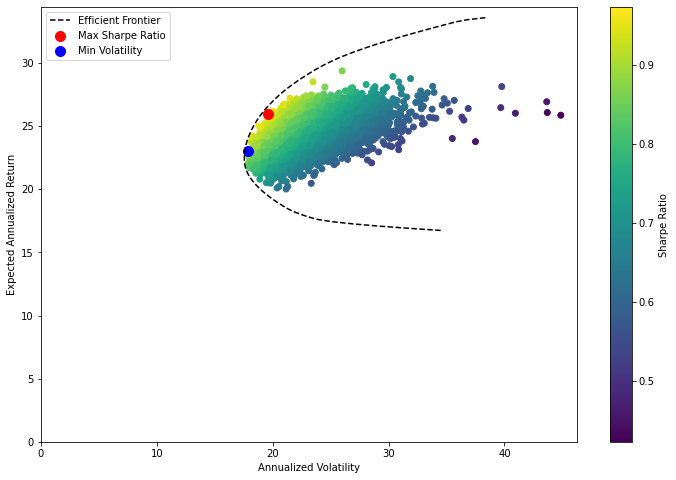

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize





# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 10000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i] - 6.9 )/ results[1,i]
    for j in range(n):
        results[j+3,i] = weights[j]



# Create a DataFrame to store simulation results
results = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'] + [f'Stock {i+1}' for i in range(n)])

# Find the portfolio with the highest Sharpe ratio
max_sharpe_port = results.iloc[results['Sharpe Ratio'].idxmax()]

# Find the portfolio with minimum volatility
min_vol_port = results.iloc[results['Volatility'].idxmin()]

# # Calculate mean returns and covariance matrix
# mean_returns = returns.mean() * 252
# cov_matrix = returns.cov() * 252

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Find the minimum and maximum returns and volatilities in the efficient frontier
min_return = min(target_returns)
max_return = max(target_returns)
min_volatility = min(efficient_frontier_volatilities)
max_volatility = max(efficient_frontier_volatilities)

# Plot the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(results['Volatility'], results['Return'], c=results['Sharpe Ratio'], cmap='viridis')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected Annualized Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='o', color='r', s=100, label='Max Sharpe Ratio')
plt.scatter(min_vol_port[1], min_vol_port[0], marker='o', color='b', s=100, label='Min Volatility')
plt.plot(efficient_frontier_volatilities, target_returns, linestyle='--', color='black', label='Efficient Frontier')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.show()


In [27]:
###working in this

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize





# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 10000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i] - 6.9 )/ results[1,i]
    for j in range(n):
        results[j+3,i] = weights[j]



# Create a DataFrame to store simulation results
results = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'] + [f'Stock {i+1}' for i in range(n)])

# # Find the portfolio with the highest Sharpe ratio
# max_sharpe_port = results.iloc[results['Sharpe Ratio'].idxmax()]
# Set the risk-free rate
risk_free_rate = 6.9

def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Find the optimal weights for the maximum Sharpe ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
max_sharpe_weights = result['x']

# Calculate the corresponding expected return and volatility
max_sharpe_return = np.dot(max_sharpe_weights.T, mean_returns)
max_sharpe_volatility = np.sqrt(np.dot(max_sharpe_weights.T, np.dot(cov_matrix, max_sharpe_weights)))
max_sharpe_ratio=(max_sharpe_return-risk_free_rate)/max_sharpe_volatility

# Print the results
print(f"Optimal weights for maximum Sharpe ratio: {max_sharpe_weights}")
print(f"Expected return for maximum Sharpe ratio: {max_sharpe_return:.5f}")
print(f"Volatility for maximum Sharpe ratio: {max_sharpe_volatility:.5f}")
print(f"Maximum Sharpe ratio: {max_sharpe_ratio:.5f}")




# # Find the portfolio with minimum volatility
# min_vol_port = results.iloc[results['Volatility'].idxmin()]
# Find the index of the minimum volatility point on the efficient frontier
min_volatility_idx = np.argmin(efficient_frontier_volatilities)

# Get the corresponding target return
min_volatility_target_return = target_returns[min_volatility_idx]

# Find the optimal weights for the minimum volatility point
constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, min_volatility_target_return)},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, min_volatility_target_return), method='SLSQP', bounds=bounds, constraints=constraints)
min_volatility_weights = result['x']

# Calculate the corresponding expected return and volatility
min_volatility_return = np.dot(min_volatility_weights.T, mean_returns)
min_volatility = efficient_frontier_volatilities[min_volatility_idx]

# Print the results
print(f"Optimal weights for minimum volatility: {min_volatility_weights}")
print(f"Expected return for minimum volatility: {min_volatility_return:.4f}")
print(f"Volatility for minimum volatility: {min_volatility:.4f}")

# # Calculate mean returns and covariance matrix
# mean_returns = returns.mean() * 252
# cov_matrix = returns.cov() * 252

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Find the minimum and maximum returns and volatilities in the efficient frontier
min_return = min(target_returns)
max_return = max(target_returns)
min_volatility = min(efficient_frontier_volatilities)
max_volatility = max(efficient_frontier_volatilities)

# Plot the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(results['Volatility'], results['Return'], c=results['Sharpe Ratio'], cmap='viridis')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected Annualized Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='o', color='r', s=100, label='Max Sharpe Ratio')
plt.scatter(min_volatility, min_volatility_return, marker='o', color='b', s=100, label='Min Volatility')
plt.plot(efficient_frontier_volatilities, target_returns, linestyle='--', color='black', label='Efficient Frontier')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.show()



Optimal weights for maximum Sharpe ratio: [0.03884485 0.05059907 0.08238897 0.215184   0.43083606 0.
 0.         0.18214705]
Expected return for maximum Sharpe ratio: 26.58611
Volatility for maximum Sharpe ratio: 19.60933
Maximum Sharpe ratio: 1.00392


TypeError: 'numpy.float64' object is not callable